In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

In [5]:
df = pd.read_csv("D:/Study/MCA/4th Sem/DA/Housing.csv")
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [6]:
Y = df['price']
X = df['lotsize']
print(type(X))
print(type(Y))
X = X.values
X = X.reshape(len(X), 1)
print(X)
Y = Y.values
Y = Y.reshape(len(Y), 1)
print(Y)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
[[ 5850]
 [ 4000]
 [ 3060]
 [ 6650]
 [ 6360]
 [ 4160]
 [ 3880]
 [ 4160]
 [ 4800]
 [ 5500]
 [ 7200]
 [ 3000]
 [ 1700]
 [ 2880]
 [ 3600]
 [ 3185]
 [ 3300]
 [ 5200]
 [ 3450]
 [ 3986]
 [ 4785]
 [ 4510]
 [ 4000]
 [ 3934]
 [ 4960]
 [ 3000]
 [ 3800]
 [ 4960]
 [ 3000]
 [ 4500]
 [ 3500]
 [ 3500]
 [ 4000]
 [ 4500]
 [ 6360]
 [ 4500]
 [ 4032]
 [ 5170]
 [ 5400]
 [ 3150]
 [ 3745]
 [ 4520]
 [ 4640]
 [ 8580]
 [ 2000]
 [ 2160]
 [ 3040]
 [ 3090]
 [ 4960]
 [ 3350]
 [ 5300]
 [ 4100]
 [ 9166]
 [ 4040]
 [ 3630]
 [ 3620]
 [ 2400]
 [ 7260]
 [ 4400]
 [ 2400]
 [ 4120]
 [ 4750]
 [ 4280]
 [ 4820]
 [ 5500]
 [ 5500]
 [ 5040]
 [ 6000]
 [ 2500]
 [ 4095]
 [ 4095]
 [ 3150]
 [ 1836]
 [ 2475]
 [ 3210]
 [ 3180]
 [ 1650]
 [ 3180]
 [ 3180]
 [ 6360]
 [ 4240]
 [ 3240]
 [ 3650]
 [ 3240]
 [ 3780]
 [ 6480]
 [ 5850]
 [ 3150]
 [ 3000]
 [ 3090]
 [ 6060]
 [ 5900]
 [ 7420]
 [ 8500]
 [ 8050]
 [ 6800]
 [ 8250]
 [ 8250]
 [ 3500]
 [ 2835]
 [ 4500]
 [ 3300]
 [ 4320]
 

In [7]:
X_train = X[:-110]
X_test = X[-110:]
print(X_train)
print(X_train)

Y_train = Y[:-110]
Y_test = Y[-110:]
print(Y_train)
print(Y_train)

[[ 5850]
 [ 4000]
 [ 3060]
 [ 6650]
 [ 6360]
 [ 4160]
 [ 3880]
 [ 4160]
 [ 4800]
 [ 5500]
 [ 7200]
 [ 3000]
 [ 1700]
 [ 2880]
 [ 3600]
 [ 3185]
 [ 3300]
 [ 5200]
 [ 3450]
 [ 3986]
 [ 4785]
 [ 4510]
 [ 4000]
 [ 3934]
 [ 4960]
 [ 3000]
 [ 3800]
 [ 4960]
 [ 3000]
 [ 4500]
 [ 3500]
 [ 3500]
 [ 4000]
 [ 4500]
 [ 6360]
 [ 4500]
 [ 4032]
 [ 5170]
 [ 5400]
 [ 3150]
 [ 3745]
 [ 4520]
 [ 4640]
 [ 8580]
 [ 2000]
 [ 2160]
 [ 3040]
 [ 3090]
 [ 4960]
 [ 3350]
 [ 5300]
 [ 4100]
 [ 9166]
 [ 4040]
 [ 3630]
 [ 3620]
 [ 2400]
 [ 7260]
 [ 4400]
 [ 2400]
 [ 4120]
 [ 4750]
 [ 4280]
 [ 4820]
 [ 5500]
 [ 5500]
 [ 5040]
 [ 6000]
 [ 2500]
 [ 4095]
 [ 4095]
 [ 3150]
 [ 1836]
 [ 2475]
 [ 3210]
 [ 3180]
 [ 1650]
 [ 3180]
 [ 3180]
 [ 6360]
 [ 4240]
 [ 3240]
 [ 3650]
 [ 3240]
 [ 3780]
 [ 6480]
 [ 5850]
 [ 3150]
 [ 3000]
 [ 3090]
 [ 6060]
 [ 5900]
 [ 7420]
 [ 8500]
 [ 8050]
 [ 6800]
 [ 8250]
 [ 8250]
 [ 3500]
 [ 2835]
 [ 4500]
 [ 3300]
 [ 4320]
 [ 3500]
 [ 4992]
 [ 4600]
 [ 3720]
 [ 3680]
 [ 3000]
 [ 3750]
 [ 5076]
 

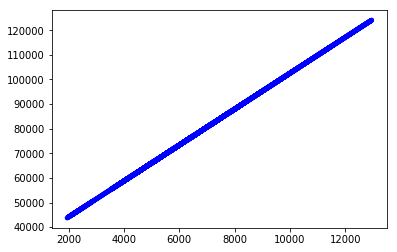

In [8]:
regr = linear_model.LinearRegression()

regr.fit(X_train, Y_train)

Y_pred = regr.predict(X_test)

plt.plot(X_test, Y_pred, color = 'blue', linewidth = 5)

In [9]:
rms = sqrt(mean_squared_error(Y_test, Y_pred))
print(rms)

23651.14224562723
